In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("tweets.csv")
data.head()

,Datetime,Tweet Id,Text,Username
0,2022-12-31 23:58:04+00:00,1609338127956545536,The Ultimate Art of War: A Step by Step Illust...,mosciski52ejffd
1,2022-12-31 23:57:58+00:00,1609338101343858690,they tried to play with my general tso's so i ...,a13george
2,2022-12-31 23:50:55+00:00,1609336328784576513,truckdriverpleb Unfortunately that is a fact....,PeterRMacIsaac
3,2022-12-31 23:49:26+00:00,1609335954514366464,lexfridman I read most of those and would rec...,levosaurus
4,2022-12-31 23:48:15+00:00,1609335659277291523,lexfridman The art of war is going to change ...,BullstreetLLC


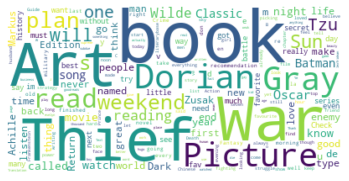

In [3]:
text = " ".join(i for i in data['Text'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors","https","t","co"])

# Generate a word cloud image
wordcloud = WordCloud(collocations = False, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [4]:
!pip install nltk

In [5]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [6]:
bigrams = get_ngrams(data['Text'], ngram_from=2, ngram_to=2,n=6)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_df.head()

,Bigram,Frequency
0,art war,1025
1,book thief,1009
2,dorian gray,927
3,picture dorian,919
4,weekend plan,372


In [7]:
trigrams = get_ngrams(data['Text'], ngram_from=3, ngram_to=3, n=15)
trigrams_df = pd.DataFrame(trigrams)
trigrams_df.columns=["Trigram", "Frequency"]
trigrams_df.head()

,Trigram,Frequency
0,picture dorian gray,917
1,weekend plan watch,124
2,called weekend plan,124
3,dorian gray oscar,112
4,tzu art war,111


In [8]:
!pip install textblob

In [9]:
from textblob import TextBlob

# Créez un objet TextBlob à partir du texte que vous souhaitez analyser
text = data['Text']
blob = TextBlob(str(text))

# Utilisez la méthode `sentiment` pour obtenir un score de polarité et de subjectivité
possitif = blob.sentiment.polarity
negatif = blob.sentiment.subjectivity

print(f"Possitif: {possitif}")
print(f"Négatif: {negatif}")


Possitif: 0.08750000000000001
Négatif: 0.49375
